In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from mlem.api import save
from datetime import datetime
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance

pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [13]:
df = pd.read_csv('data/all_data.csv')
df.head()

,text,label,verdict,neg_score,pos_score,neu_score
0,I love sci-fi and am willing to put up with a ...,0,positive,0.00470,0.96922,0.02609
1,"Worth the entertainment value of a rental, esp...",0,positive,0.01199,0.66930,0.31871
2,its a totally average film with a few semi-alr...,0,negative,0.90883,0.00991,0.08126
3,STAR RATING: ***** Saturday Night **** Friday ...,0,neutral,0.01755,0.04320,0.93925
4,"First off let me say, If you haven't enjoyed a...",0,neutral,0.09703,0.13889,0.76408


In [14]:
map_label = {'positive':1, "negative":0, "neutral":2}

df['model_label'] = df['verdict'].map(map_label)
df.head()

,text,label,verdict,neg_score,pos_score,neu_score,model_label
0,I love sci-fi and am willing to put up with a ...,0,positive,0.00470,0.96922,0.02609,1
1,"Worth the entertainment value of a rental, esp...",0,positive,0.01199,0.66930,0.31871,1
2,its a totally average film with a few semi-alr...,0,negative,0.90883,0.00991,0.08126,0
3,STAR RATING: ***** Saturday Night **** Friday ...,0,neutral,0.01755,0.04320,0.93925,2
4,"First off let me say, If you haven't enjoyed a...",0,neutral,0.09703,0.13889,0.76408,2


<AxesSubplot: >

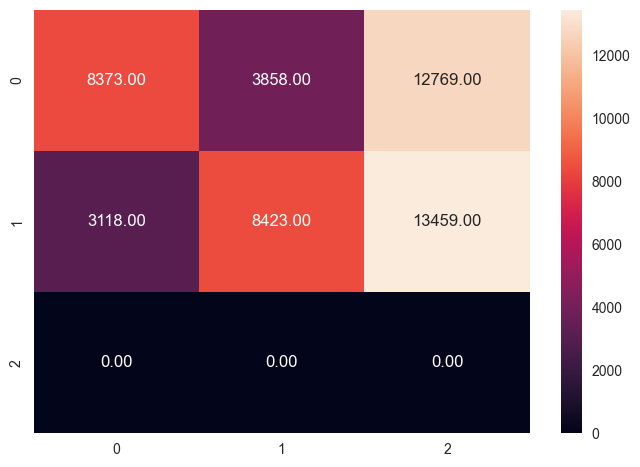

In [18]:
sns.heatmap(confusion_matrix(df['label'], df['model_label']), annot=True,fmt='.2f')

In [19]:
accuracy_score(df['label'], df['model_label'])

0.33592

In [92]:
df[(df['label']==1)&(df['model_label']==2)]

,text,label,verdict,neg_score,pos_score,neu_score,model_label
12500,Previous reviewer Claudio Carvalho gave a much...,1,neutral,0.03289,0.07223,0.89488,2
12501,"CONTAINS ""SPOILER"" INFORMATION. Watch this dir...",1,neutral,0.26100,0.03246,0.70654,2
12502,This is my first Deepa Mehta film. I saw the f...,1,neutral,0.01004,0.31436,0.67561,2
12506,Now I do understand that this film was not mea...,1,neutral,0.12149,0.22308,0.65543,2
12507,There are questions that sometimes hover over ...,1,neutral,0.23790,0.03610,0.72599,2
...,...,...,...,...,...,...,...
49989,David Duchovney creates a role that he was to ...,1,neutral,0.01487,0.20671,0.77842,2
49990,Like I said its a hidden surprise. It well wri...,1,neutral,0.20159,0.07667,0.72174,2
49997,This film and it's sequel Barry Mckenzie holds...,1,neutral,0.11151,0.25944,0.62905,2
49998,'The Adventures Of Barry McKenzie' started lif...,1,neutral,0.00703,0.07161,0.92137,2


In [33]:
Xfeatures = df[['neg_score', 'pos_score']]

/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


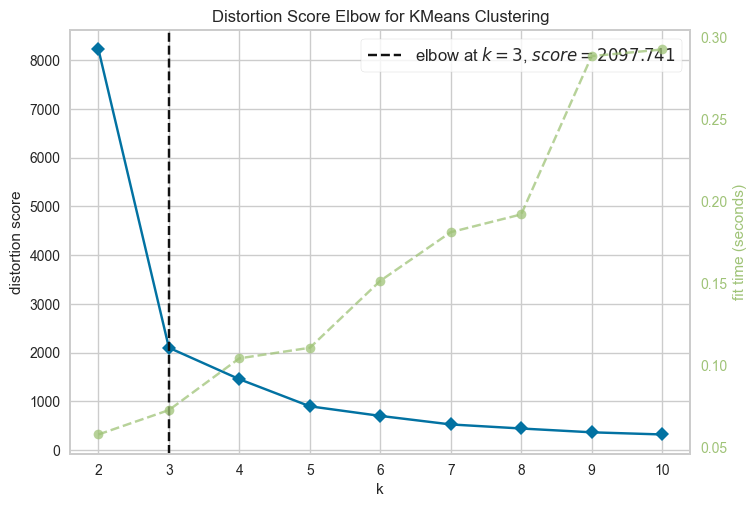

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
model = KElbowVisualizer(KMeans(random_state=42),  k=10)
model.fit(Xfeatures)
model.show()

/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a.okoh/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


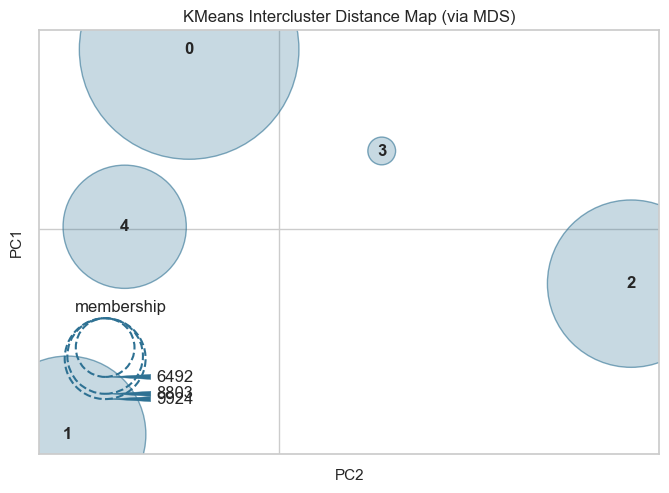

<AxesSubplot: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [99]:
model = KMeans(5,random_state=0)
visualizer = InterclusterDistance(model)

visualizer.fit(Xfeatures)        # Fit the data to the visualizer
visualizer.show()  